This notebook is part of the $\omega radlib$ documentation: http://wradlib.org/wradlib-docs.

Copyright (c) 2018, $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# RADOLAN Product Showcase

In this notebook an overview over the existing RADOLAN products is given.

## Setup Environment

Import modules, filter warnings to avoid cluttering output with DeprecationWarnings and use matplotlib inline or interactive mode if running in ipython or python respectively.

In [1]:
import wradlib as wrl
import matplotlib.pyplot as pl
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

/home/travis/miniconda/envs/wradlib/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Get RADOLAN Grid and RADOLAN Extended Grid.

In [2]:
# Get coordinates
radolan_grid_xy = wrl.georef.get_radolan_grid(900,900)
radolan_egrid_xy = wrl.georef.get_radolan_grid(1500,1400)
radolan_wgrid_xy = wrl.georef.get_radolan_grid(1100, 900)
x = radolan_grid_xy[:,:,0]
y = radolan_grid_xy[:,:,1]

xe = radolan_egrid_xy[:,:,0]
ye = radolan_egrid_xy[:,:,1]

xw = radolan_wgrid_xy[:,:,0]
yw = radolan_wgrid_xy[:,:,1]


Define data reading function and plotting function.

In [3]:
def read_radolan(radfile):
    radfile = wrl.util.get_wradlib_data_file('radolan/showcase/' + radfile)
    return wrl.io.read_RADOLAN_composite(radfile)

In [4]:
def plot_radolan(data, attrs, grid, clabel=None):
    fig = pl.figure(figsize=(10,8))
    ax = fig.add_subplot(111, aspect='equal')
    x = grid[:,:,0]
    y = grid[:,:,1]
    pm = ax.pcolormesh(x, y, data, cmap='nipy_spectral')
    cb = fig.colorbar(pm, shrink=0.75)
    cb.set_label(clabel)
    pl.xlabel("x [km]")
    pl.ylabel("y [km]")
    pl.title('{0} Product\n{1}'.format(attrs['producttype'], 
                                       attrs['datetime'].isoformat()))
    pl.xlim((x[0,0],x[-1,-1]))
    pl.ylim((y[0,0],y[-1,-1]))
    pl.grid(color='r')


## RADOLAN Composite

A few products including RW and SF are available free of charge at this [DWD FTP Server](ftp://ftp-cdc.dwd.de/pub/CDC/grids_germany/). A full list of RADOLAN products can be found in the [DWD RADOLAN/RADVOR-OP Kompositformat](https://www.dwd.de/DE/leistungen/radolan/radolan_info/radolan_radvor_op_komposit_format_pdf.pdf?__blob=publicationFile&v=5).

Currently, most of the RADOLAN composites have a spatial resolution of 1km x 1km, with the [National Composites](#National-Composites) (R-, S- and W-series) being 900 x 900 km grids, and the [European Composites](#Extended-RADOLAN-Composites) 1500 x 1400 km grids. The polar-stereographic projection is described in the chapter [RADOLAN Grid](radolan_grid.ipynb).

One difference is the extended National Composite (only WX) with a 1100 x 900 km grid.

Also the [PG/PC-Product](#RADOLAN-PG/PC-Product) with 460 x 460 km grid and runlength-coding is shortly described.

### National Composites


 ID  |  INT  | avail | Description                         
---- | ----: | ----- | -----------
 RX/WX | 5 min | 5 min | original radardata in qualitative RVP6-units (1 byte coded)
 RZ | 5 min | 5 min | radardata after correction of PBB converted to rainrate <br>with improved Z-R-relation        
 RY | 5 min | 5 min | radardata after correction with <br>Quality-composit (QY)
 RH | 1 h | 5 min | 1 h summation of RZ-composit
 RB | 1 h | hh:50 | 1 h summation with preadjustment
 RW | 1 h | hh:50 | 1 h summation with standard <br>adjustment "best of two"
 RL | 1 h | hh:50 | 1 h summation with adjustment by Merging
 RU | 1 h | hh:50 | 1 h summation with standard and <br>merging adjustment "best of three"
 SQ | 6 h | hh:50 | 6 h summation of RW
 SH | 12 h | hh:50 | 12 h summation of RW
 SF | 24 h | hh:50 | 24 h summation of RW
 W1 | 7 d  | 05:50 | 7 d summation of RW
 W2 | 14 d | 05:50 | 14 d summation of RW
 W3 | 21 d | 05:50 | 21 d summation of RW
 W4 | 30 d | 05:50 | 30 d summation of RW


#### RADOLAN RX Product

Load data from data source.

In [5]:
data, attrs = read_radolan('raa01-rx_10000-1408102050-dwd---bin.gz')


Mask data and apply scale and offset

In [6]:
data = np.ma.masked_equal(data, -9999) / 2 - 32.5

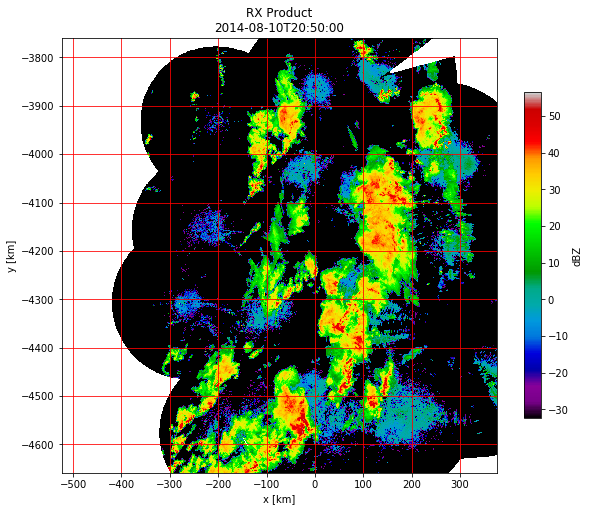

In [7]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='dBZ')

#### RADOLAN RZ Product

Load data from data source

In [8]:
data, attrs = read_radolan('raa01-rz_10000-1408102050-dwd---bin.gz')

Mask data

In [9]:
data = np.ma.masked_equal(data, -9999)

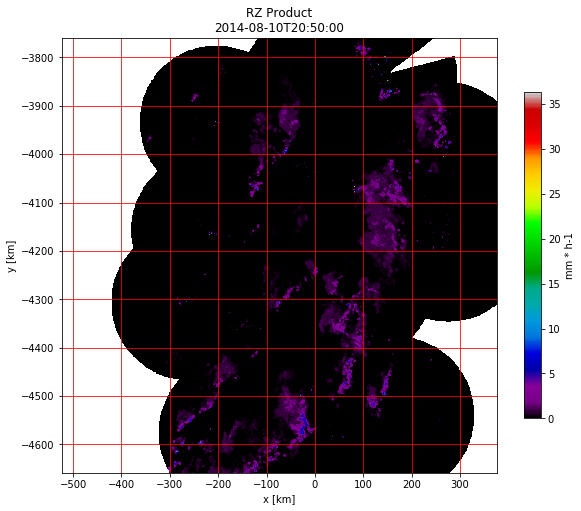

In [10]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN RY Product

Load data from data source

In [11]:
data, attrs = read_radolan('raa01-ry_10000-1408102050-dwd---bin.gz')

Mask data

In [12]:
data = np.ma.masked_equal(data, -9999)

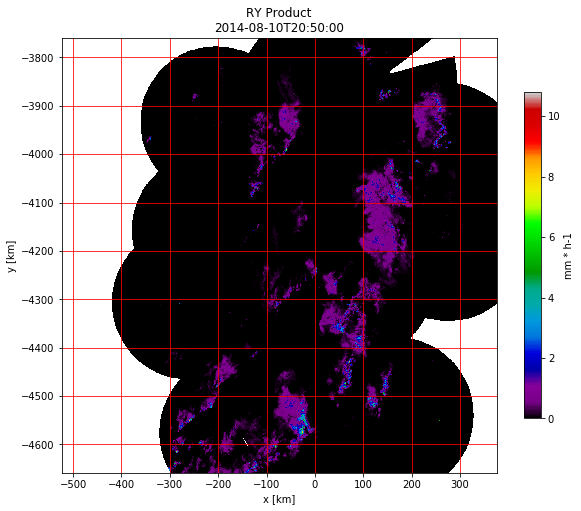

In [13]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN RH Product

Load data from data source

In [14]:
data, attrs = read_radolan('raa01-rh_10000-1408102050-dwd---bin.gz')

Mask data

In [15]:
data = np.ma.masked_equal(data, -9999) / 2 - 32.5

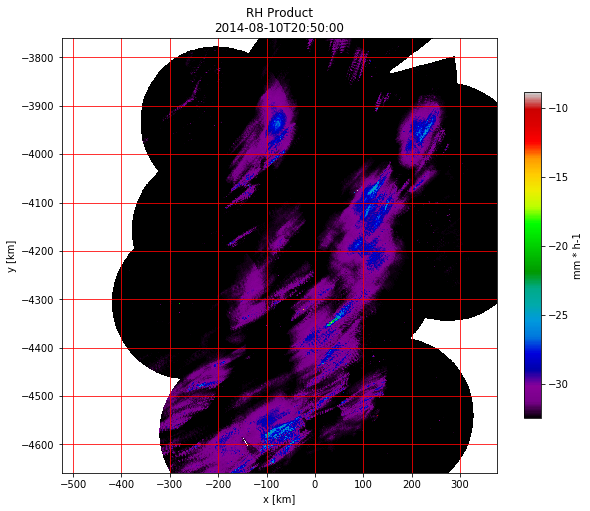

In [16]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN RB Product

Load data from data source

In [17]:
data, attrs = read_radolan('raa01-rb_10000-1408102050-dwd---bin.gz')

Mask data

In [18]:
data = np.ma.masked_equal(data, -9999)

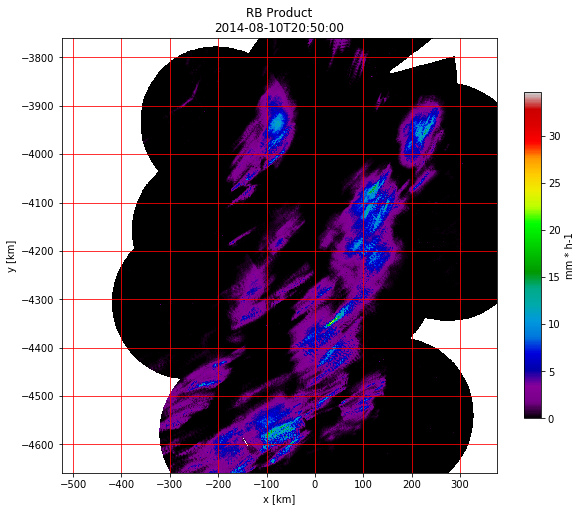

In [19]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN RL Product

Load data from data source

In [20]:
data, attrs = read_radolan('raa01-rl_10000-1408102050-dwd---bin.gz')

Mask data

In [21]:
data = np.ma.masked_equal(data, -9999)

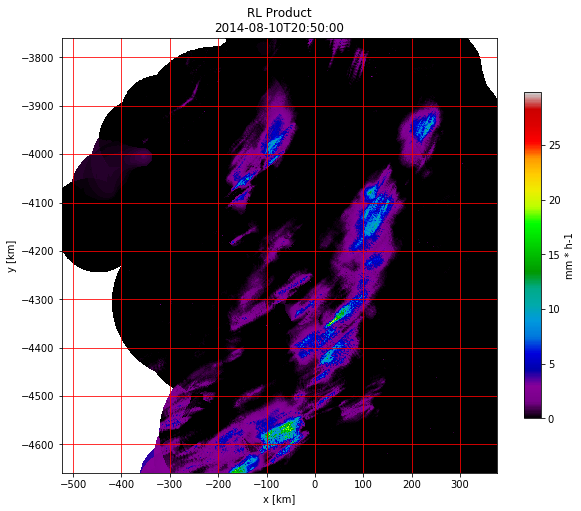

In [22]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN RW Product

Load data from data source

In [23]:
data, attrs = read_radolan('raa01-rw_10000-1408102050-dwd---bin.gz')

Mask data

In [24]:
data = np.ma.masked_equal(data, -9999)

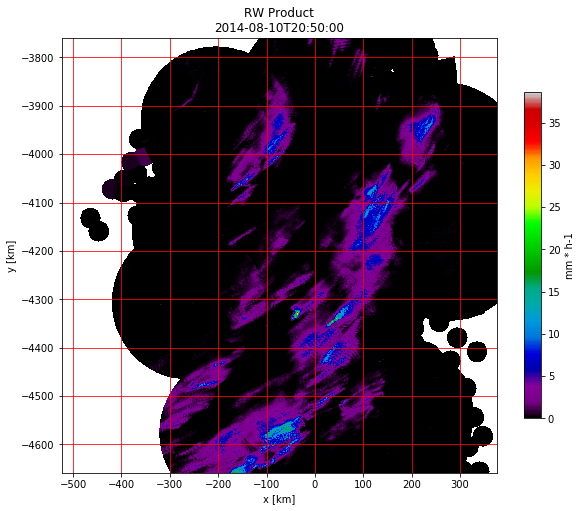

In [25]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN RU Product

Load data from data source

In [26]:
data, attrs = read_radolan('raa01-ru_10000-1408102050-dwd---bin.gz')

Mask data

In [27]:
data = np.ma.masked_equal(data, -9999)

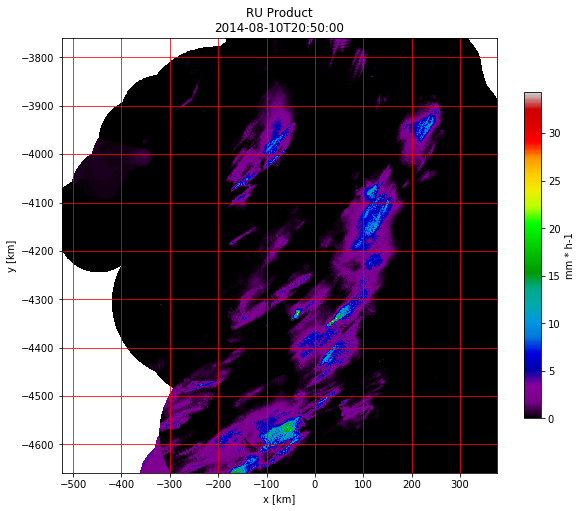

In [28]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN SQ Product

Load data from data source

In [29]:
data, attrs = read_radolan('raa01-sq_10000-1408102050-dwd---bin.gz')

Mask data

In [30]:
data = np.ma.masked_equal(data, -9999)

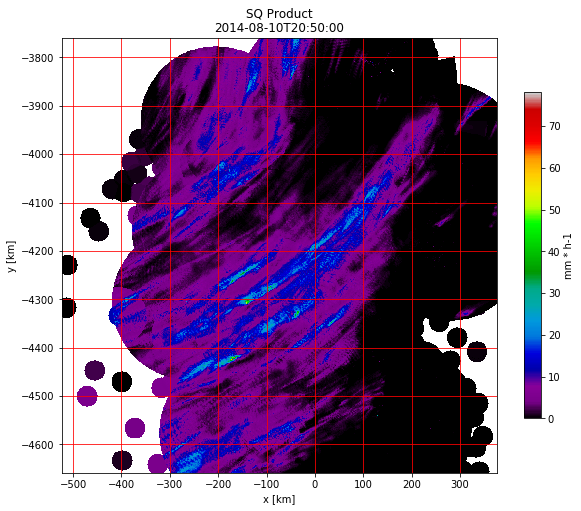

In [31]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN SH Product

Load data from data source

In [32]:
data, attrs = read_radolan('raa01-sh_10000-1408102050-dwd---bin.gz')

Mask data

In [33]:
data = np.ma.masked_equal(data, -9999)

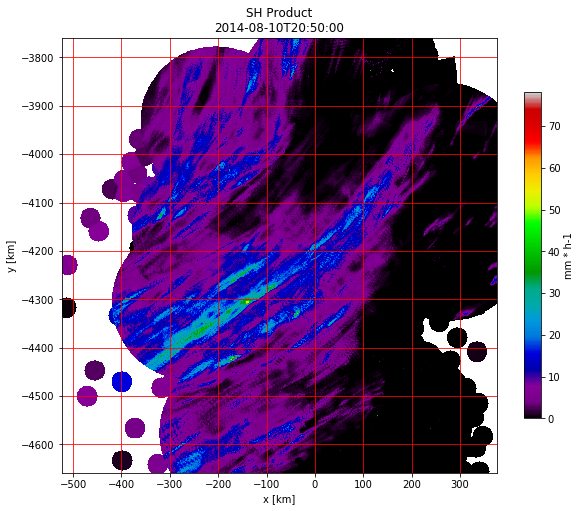

In [34]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN SF Product

Load data from data source

In [35]:
data, attrs = read_radolan('raa01-sf_10000-1408102050-dwd---bin.gz')

Mask data

In [36]:
data = np.ma.masked_equal(data, -9999)

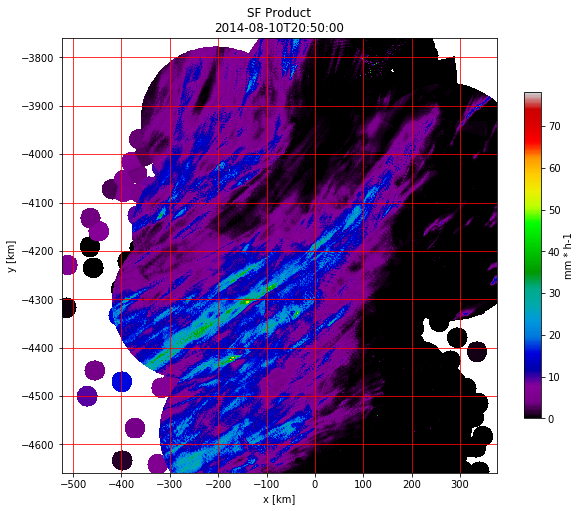

In [37]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN W1 Product

Load data from data source

In [38]:
data, attrs = read_radolan('raa01-w1_10000-1408110550-dwd---bin.gz')

Mask data

In [39]:
data = np.ma.masked_equal(data, -9999)

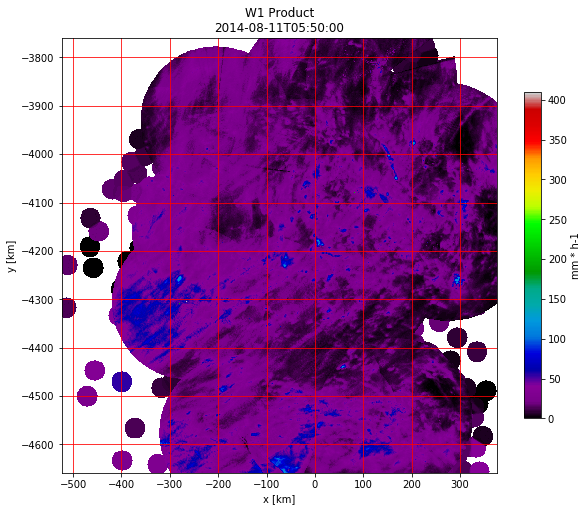

In [40]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN W2 Product

Load data from data source

In [41]:
data, attrs = read_radolan('raa01-w2_10000-1408110550-dwd---bin.gz')

Mask data

In [42]:
data = np.ma.masked_equal(data, -9999)

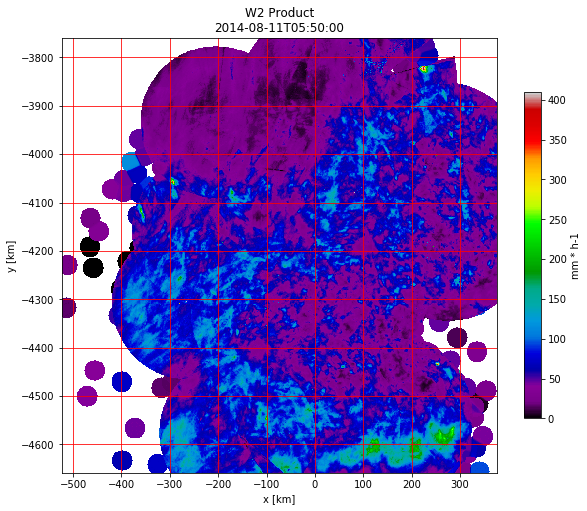

In [43]:
plot_radolan(data, attrs, radolan_grid_xy, clabel='mm * h-1')

#### RADOLAN WX Product

In [44]:
data, attrs = read_radolan('raa01-wx_10000-1408102050-dwd---bin.gz')

Mask data

In [45]:
data = np.ma.masked_equal(data, -9999) / 2 - 32.5

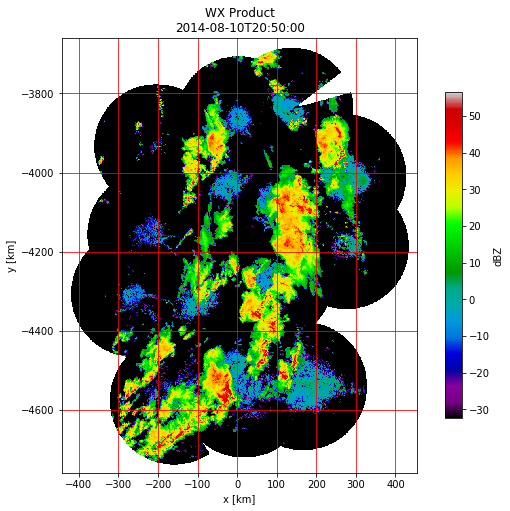

In [46]:
plot_radolan(data, attrs, radolan_wgrid_xy, clabel='dBZ')

### Extended RADOLAN Composites

The common central european products with a range of 1500 km by 1400 km are presented in the following table:

 ID |  INT  | avail | Description
--- | ----: | ----- | ----------- 
 EX | 5 min | 5 min | analogue RX
 EZ | 5 min | 5 min | analogue RZ
 EY | 5 min | 5 min | analogue EY after correction <br>with Quality-composit
 EH |  1 h  | hh:50 | analogue RH (no preadjustment) <br>1 h summation of EY-composite
 EB |  1 h  | hh:50 | analogue RB (with preadjustment) <br>1 h summation
 EW |  1 h  | hh:50 | analogue RW (full adjustment) <br>1 h summation


#### RADOLAN EX Product

Load data from data source

In [47]:
data, attrs = read_radolan('raa01-ex_10000-1408102050-dwd---bin.gz')

Mask data and apply scale and offset

In [48]:
data = np.ma.masked_equal(data, -9999) / 2 - 32.5

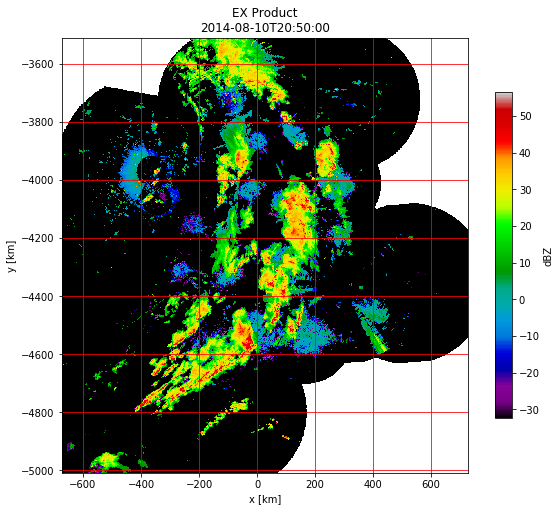

In [49]:
plot_radolan(data, attrs, radolan_egrid_xy, clabel='dBZ')

#### RADOLAN EZ Product

Load data from data source

In [50]:
data, attrs = read_radolan('raa01-ez_10000-1408102050-dwd---bin.gz')

Mask data

In [51]:
data = np.ma.masked_equal(data, -9999)

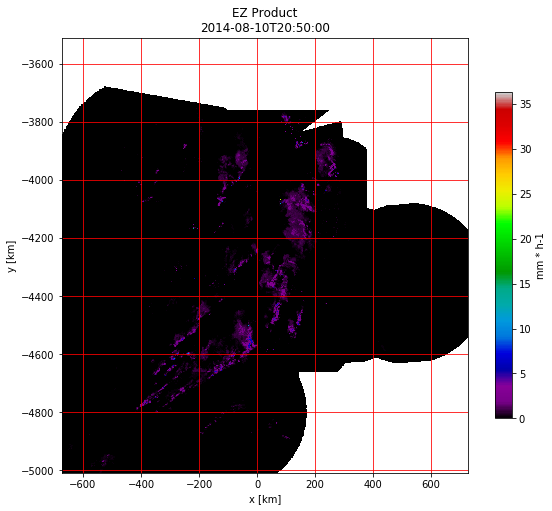

In [52]:
plot_radolan(data, attrs, radolan_egrid_xy, clabel='mm * h-1')

#### RADOLAN EY Product

Load data from data source

In [53]:
data, attrs = read_radolan('raa01-ey_10000-1408102050-dwd---bin.gz')

Mask data

In [54]:
data = np.ma.masked_equal(data, -9999)

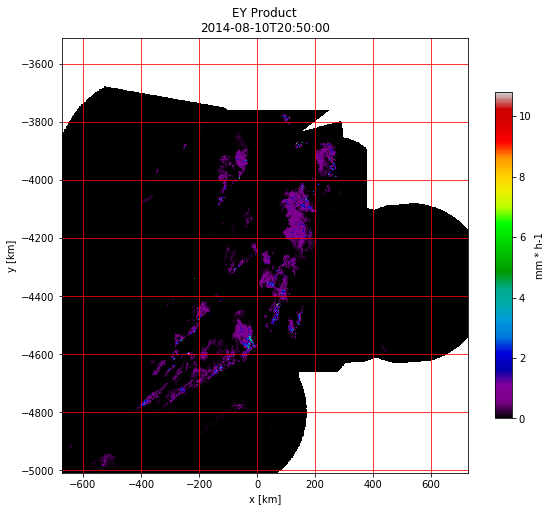

In [55]:
plot_radolan(data, attrs, radolan_egrid_xy, clabel='mm * h-1')

#### RADOLAN EH Product

Load data from data source

In [56]:
data, attrs = read_radolan('raa01-eh_10000-1408102050-dwd---bin.gz')

Mask data

In [57]:
data = np.ma.masked_equal(data, -9999)

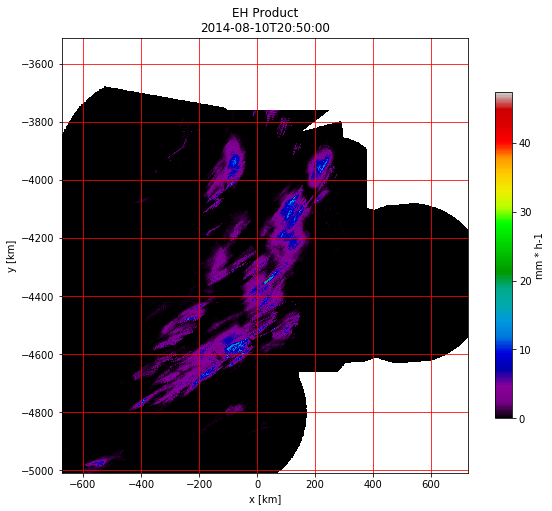

In [58]:
plot_radolan(data, attrs, radolan_egrid_xy, clabel='mm * h-1')

#### RADOLAN EB Product

Load data from data source

In [59]:
data, attrs = read_radolan('raa01-eb_10000-1408102050-dwd---bin.gz')

Mask data

In [60]:
data = np.ma.masked_equal(data, -9999)

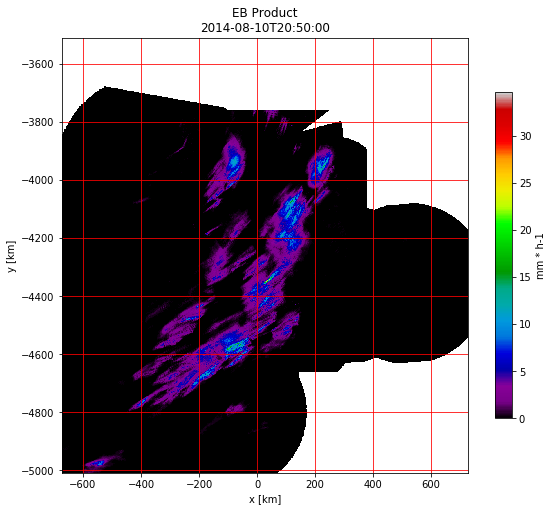

In [61]:
plot_radolan(data, attrs, radolan_egrid_xy, clabel='mm * h-1')

### RADOLAN PG/PC Product

The PG/PC product is a bit different from the normal RADOLAN formats. The header is actually the same, but the data is runlength encoded. Also the RADOLAN grid cells have 2km edge length (460x460 cells).

Load data from data source

In [62]:
radfile = 'raa00-pc_10015-1408030905-dwd---bin.gz'
radfile = wrl.util.get_wradlib_data_file('radolan/misc/' + radfile)
data, attrs = wrl.io.read_RADOLAN_composite(radfile, missing=255)
radolan_grid_pc = wrl.georef.get_radolan_grid(460,460)

Mask data

In [63]:
data = np.ma.masked_equal(data, 255)
print(data.shape)

(460, 460)


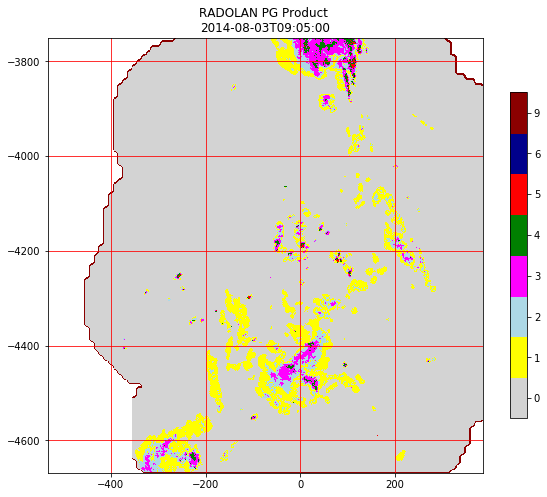

In [64]:
# plot the images side by side
pl.figure(figsize=(10, 8))
pl.subplot(111, aspect='equal')
X = radolan_grid_pc[:,:,0]
Y = radolan_grid_pc[:,:,1]
# color-scheme taken from DWD "legend_radar_products_pc.pdf"
colors = ['lightgrey', 'yellow', 'lightblue', 'magenta', 'green',
          'red', 'darkblue', 'darkred']
cmap = mpl.colors.ListedColormap(colors, name=u'DWD-pc-scheme')
bounds = np.arange(len(colors) + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
pl.pcolormesh(X, Y, data, cmap=cmap, norm=norm)
pl.xlim((X[0,0], X[-1,-1]))
pl.ylim((Y[0,0], Y[-1,-1]))

# add colorbar and do some magic for proper visualisation
cb = pl.colorbar(shrink=0.75, norm=norm, boundaries=bounds)
loc = bounds + .5
cb.set_ticks(loc)
labels = bounds[:-1]
cb.set_ticklabels(labels)
cl = cb.ax.get_yticklabels()
cl[-1].set_text('9')
cb.ax.set_yticklabels([elem.get_text() for elem in cl])
pl.title('RADOLAN PG Product \n' + attrs['datetime'].isoformat())
pl.grid(color='r')